In [1]:
from pathlib import Path
from scipy import stats

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

np.set_printoptions(suppress=True)

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

from sklearn.linear_model import LogisticRegression

from IPython.display import display, Markdown

In [2]:
path1 = Path(r"A:\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")
path2 = Path(r"C:\Users\rober\Documents\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")

if path1.is_dir():
    DATASET_DIR = path1
else:
    DATASET_DIR = path2

In [3]:
app_train = pd.read_csv(DATASET_DIR / "2. Datenaufbereitung" / "app_train.csv")
pa_ip = pd.read_csv(DATASET_DIR / "2. Datenaufbereitung" / "pa_ip.csv")
description = pd.read_csv(DATASET_DIR / "HomeCredit_columns_description.csv", encoding="latin", index_col=0)

In [4]:
app_train = app_train.set_index("SK_ID_CURR")
pa_ip = pa_ip.set_index("SK_ID_CURR")

In [5]:
ID_Payback = app_train[app_train["TARGET"] == 0].index.values
ID_Default = app_train[app_train["TARGET"] == 1].index.values

In [6]:
ID_Payback = np.intersect1d(ID_Payback, pa_ip.index.values)
ID_Default = np.intersect1d(ID_Default, pa_ip.index.values)

In [7]:
payback = pa_ip.loc[ID_Payback]
default = pa_ip.loc[ID_Default]

In [8]:
mets = ["PA_AMT_ANNUITY", "PA_AMT_APPLICATION", "PA_AMT_CREDIT", "PA_AMT_DOWN_PAYMENT", "PA_AMT_GOODS_PRICE","PA_RATE_DOWN_PAYMENT"]

In [9]:
pa_ip.head()

,PA_CNT_CREDITS,PA_IP_PAYMENT_30,PA_IP_DAYS_DIFF_30,PA_IP_AMT_DIFF_30,PA_IP_PAYMENT_60,PA_IP_DAYS_DIFF_60,PA_IP_AMT_DIFF_60,PA_IP_PAYMENT_90,PA_IP_DAYS_DIFF_90,PA_IP_AMT_DIFF_90,PA_IP_PAYMENT_120,PA_IP_DAYS_DIFF_120,PA_IP_AMT_DIFF_120,PA_IP_PAYMENT_150,PA_IP_DAYS_DIFF_150,PA_IP_AMT_DIFF_150,PA_IP_PAYMENT_180,PA_IP_DAYS_DIFF_180,PA_IP_AMT_DIFF_180,PA_AMT_ANNUITY,PA_AMT_APPLICATION,PA_AMT_CREDIT,PA_AMT_DOWN_PAYMENT,PA_AMT_GOODS_PRICE,PA_RATE_DOWN_PAYMENT,PA_CNT_NAME_CONTRACT_TYPE_Revolving loans,PA_CNT_NAME_CONTRACT_STATUS_Refused,PA_CNT_CODE_REJECT_REASON_HC,PA_CNT_NAME_CLIENT_TYPE_New,PA_CNT_NAME_CLIENT_TYPE_Refreshed,PA_CNT_NAME_PORTFOLIO_Cards,PA_CNT_NAME_PRODUCT_TYPE_walk-in,PA_CNT_NAME_YIELD_GROUP_high,PA_CNT_NAME_YIELD_GROUP_low_normal,PA_CNT_PRODUCT_COMBINATION_Card Street,PA_CNT_PRODUCT_COMBINATION_Cash X-Sell: low,PA_CNT_PRODUCT_COMBINATION_POS industry with interest
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
252457,1,-9.128709e-01,0.0,0.0,9.128709e-01,-15.0,0.0,9.128709e-01,-17.0,0.0,0.912871,-14.0,0.0,-0.912871,0.0,0.0,-0.912871,0.0,0.0,4951.350,47056.275,52641.0,4.275,47056.275,0.000088,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
256657,2,2.041241e-01,-6.0,0.0,2.041241e-01,-13.0,0.0,2.041241e-01,-12.0,0.0,0.204124,-12.5,0.0,0.204124,-13.0,0.0,-1.020621,-1.5,0.0,49054.770,978570.000,1198062.0,15714.000,978570.000,0.217818,2.0,7.0,5.0,1.0,0.0,2.0,5.0,0.0,2.0,1.0,0.0,0.0
198678,2,4.540312e-08,-20.0,0.0,4.540312e-08,-21.5,0.0,4.540312e-08,-6.5,0.0,-0.000407,-1.0,0.0,0.000204,0.5,0.0,0.000204,-0.5,0.0,98806.050,921721.500,941661.0,13347.000,921721.500,0.193358,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
394447,2,5.295619e-01,-0.5,0.0,6.115381e-01,-7.0,0.0,-3.183548e-01,-7.0,0.0,-0.229629,-6.5,0.0,-0.180184,-8.5,0.0,-0.412932,0.0,0.0,17141.445,129132.000,129132.0,0.000,129132.000,0.000000,1.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
156331,2,-7.381905e-01,0.0,0.0,1.416426e-02,0.0,0.0,1.416426e-02,0.0,0.0,-1.114368,-1.0,0.0,1.207845,-12.5,0.0,0.616385,-5.0,0.0,40866.795,793035.000,793035.0,0.000,793035.000,0.000000,2.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,1.0,1.0,0.0,0.0


### PA_AMT_ANNUITY

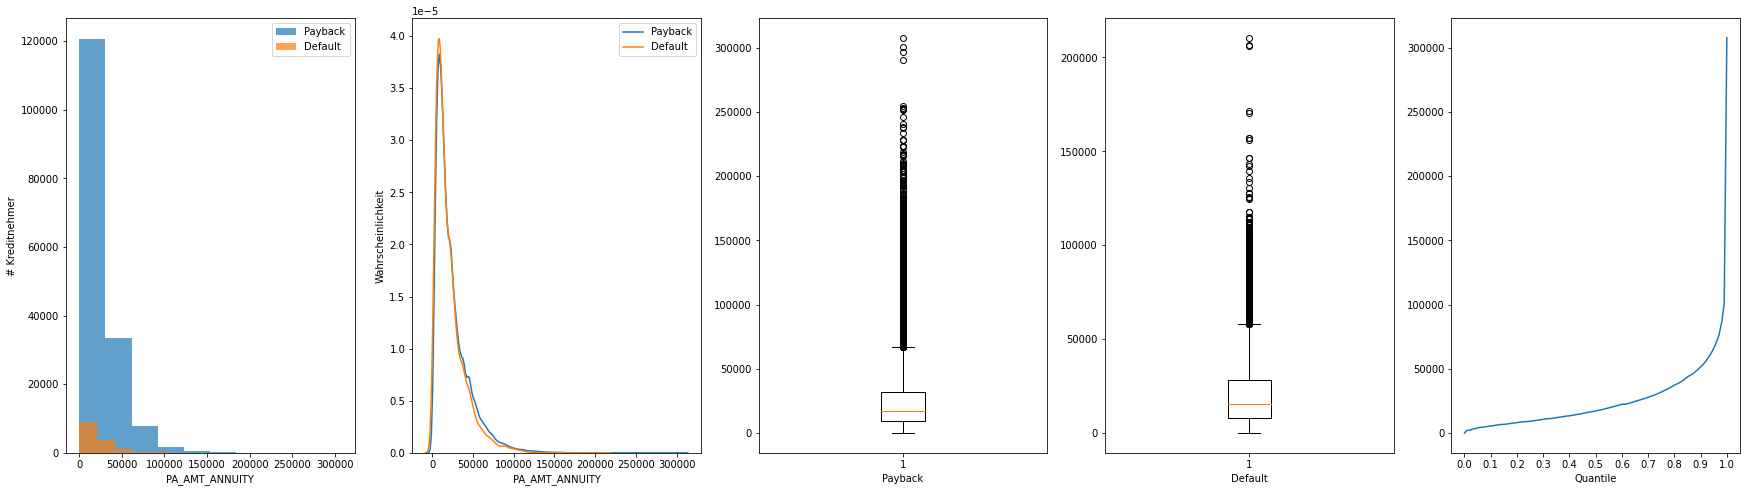

### PA_AMT_APPLICATION

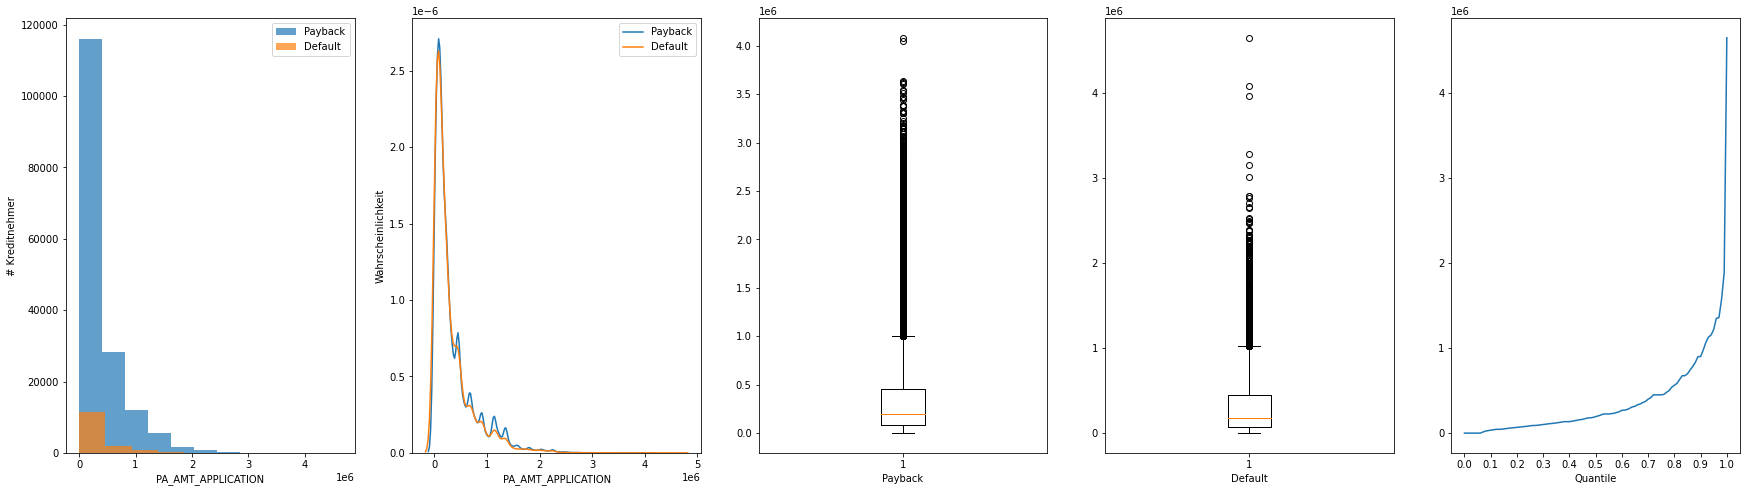

### PA_AMT_CREDIT

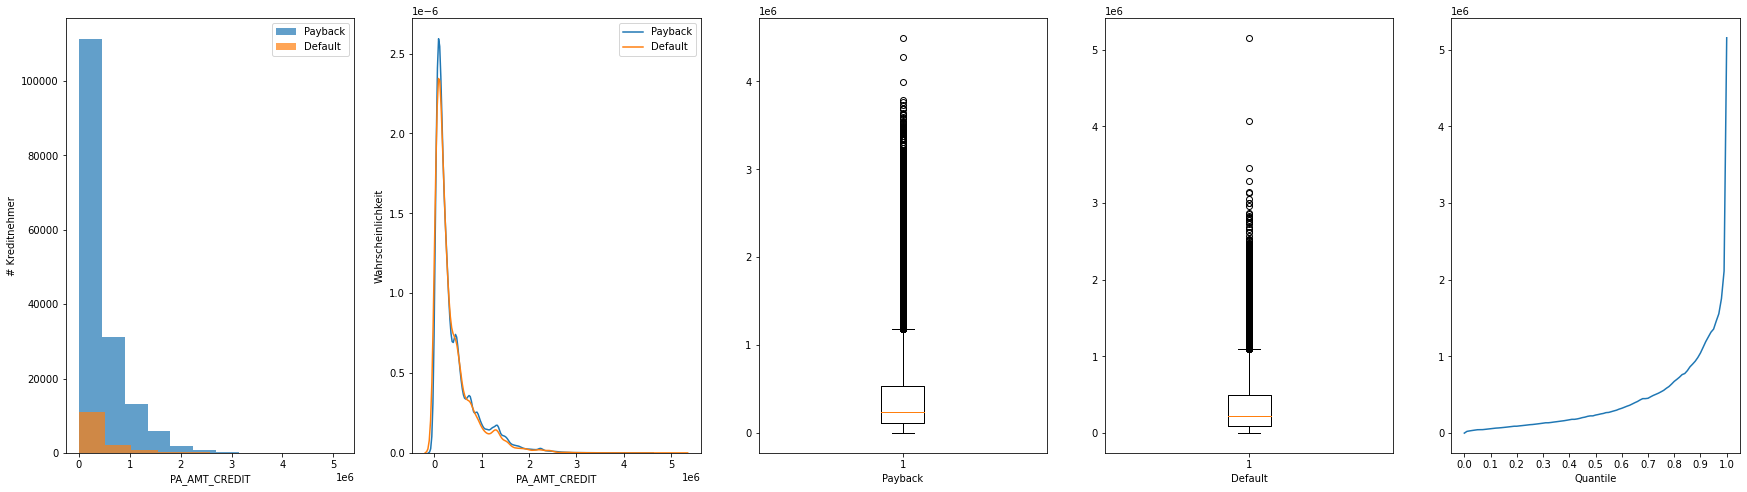

### PA_AMT_DOWN_PAYMENT

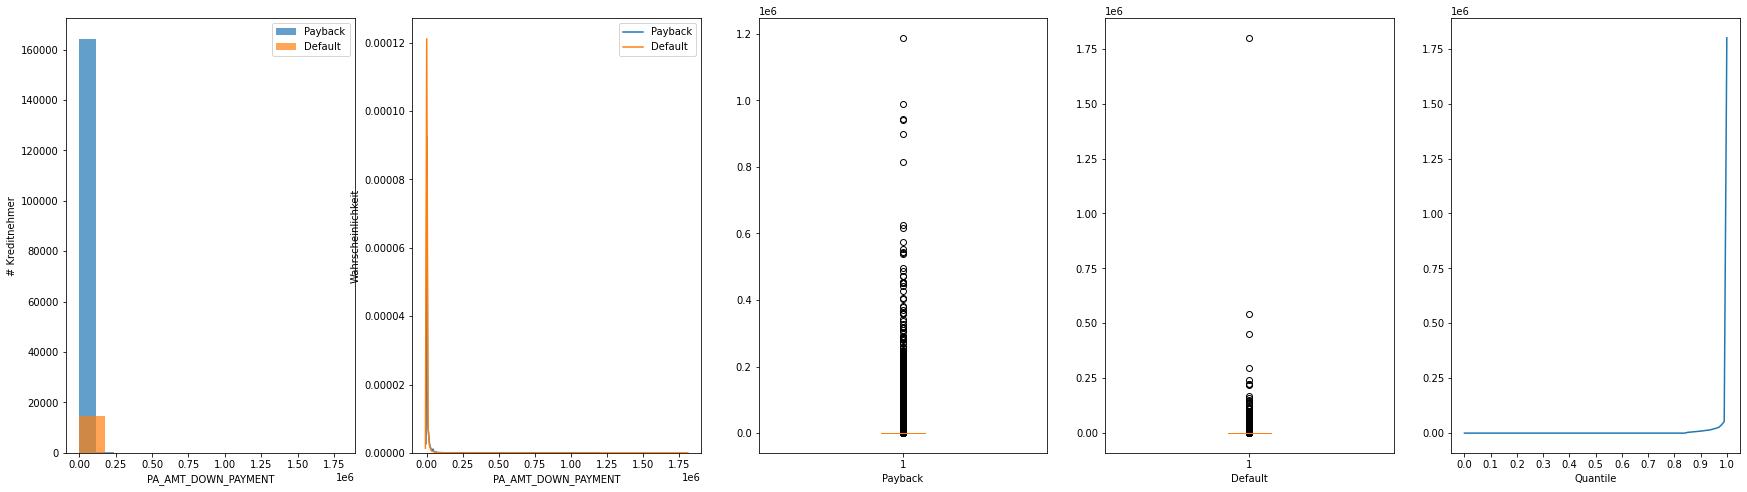

### PA_AMT_GOODS_PRICE

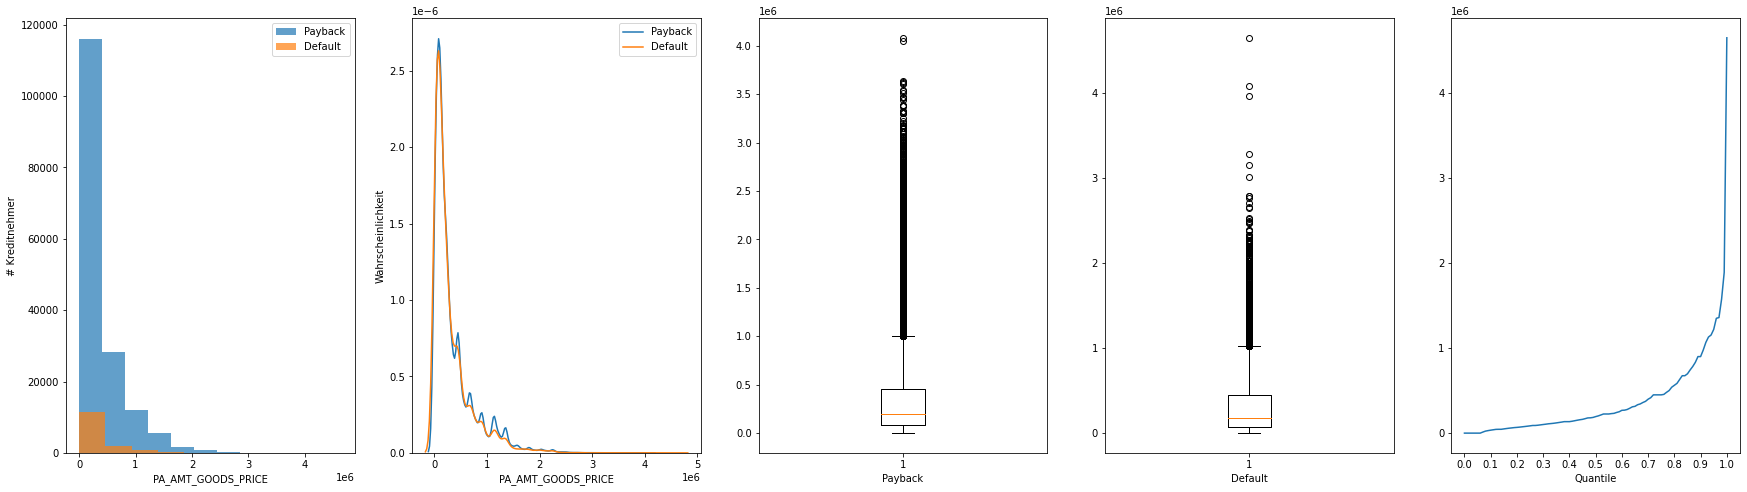

### PA_RATE_DOWN_PAYMENT

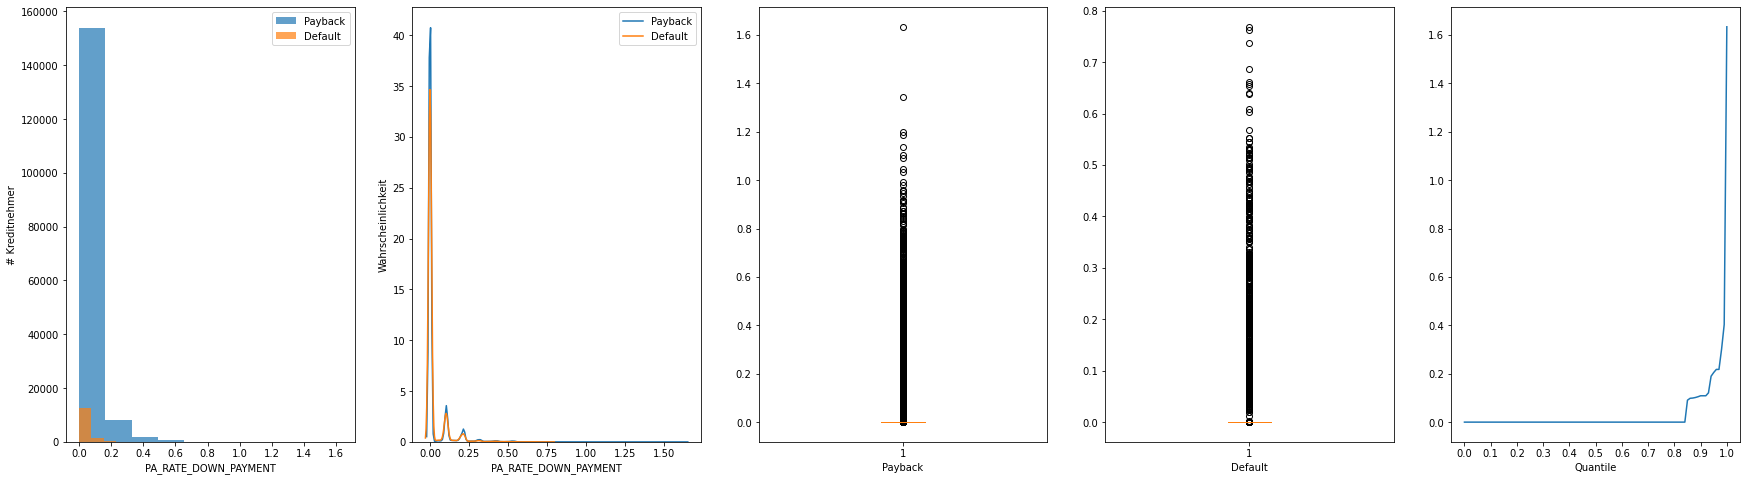

In [10]:
for head in mets:
    display(Markdown("### {head}".format(head=head)))

    pb = payback[head].copy()
    df = default[head].copy()

    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5)
    fig.set_size_inches(30, 8)

    ax1.hist(pb, alpha=0.7)
    ax1.hist(df, alpha=0.7)
    ax1.legend(labels=["Payback","Default"])
    ax1.set_xlabel(head)
    ax1.set_ylabel("# Kreditnehmer")

    sns.kdeplot(pb, alpha=0.7, ax=ax2)
    sns.kdeplot(df, alpha=0.7, ax=ax2)
    ax2.legend(labels=["Payback","Default"])
    ax2.set_xlabel(head)
    ax2.set_ylabel("Wahrscheinlichkeit")

    a = payback[head].copy()
    a = a.dropna()
    ax3.boxplot(a)
    ax3.set_xlabel("Payback")
    

    b = default[head].copy()
    b = b.dropna()
    ax4.boxplot(b)
    ax4.set_xlabel("Default")

    quantiles = [pa_ip[head].quantile(el) for el in np.arange(0,1 + 0.01,0.01)]
    ax5.plot(np.arange(0,1 + 0.01,0.01), quantiles)
    ax5.set_xticks(np.arange(0,1 + 0.1,0.1))
    ax5.set_xlabel("Quantile")

    plt.show()

In [11]:
todo = ["PA_AMT_ANNUITY","PA_AMT_APPLICATION","PA_AMT_CREDIT","PA_AMT_DOWN_PAYMENT","PA_AMT_GOODS_PRICE","PA_RATE_DOWN_PAYMENT"]

In [12]:
pa_ip[todo].head()

,PA_AMT_ANNUITY,PA_AMT_APPLICATION,PA_AMT_CREDIT,PA_AMT_DOWN_PAYMENT,PA_AMT_GOODS_PRICE,PA_RATE_DOWN_PAYMENT
SK_ID_CURR,,,,,,
252457,4951.350,47056.275,52641.0,4.275,47056.275,0.000088
256657,49054.770,978570.000,1198062.0,15714.000,978570.000,0.217818
198678,98806.050,921721.500,941661.0,13347.000,921721.500,0.193358
394447,17141.445,129132.000,129132.0,0.000,129132.000,0.000000
156331,40866.795,793035.000,793035.0,0.000,793035.000,0.000000


In [13]:
todo

['PA_AMT_ANNUITY',
 'PA_AMT_APPLICATION',
 'PA_AMT_CREDIT',
 'PA_AMT_DOWN_PAYMENT',
 'PA_AMT_GOODS_PRICE',
 'PA_RATE_DOWN_PAYMENT']

PA_AMT_ANNUITY

In [14]:
head = "PA_AMT_ANNUITY"

In [15]:
quantiles = [pa_ip[head].quantile(el) for el in np.arange(0,1 + 0.01,0.01)]
distance = [quantiles[x] - quantiles[x-1] for x in range(len(quantiles))]
distance = distance[1:]
distance = distance / np.sum(distance) * 100
quants_relative = pd.DataFrame(distance, index=np.arange(0,1,0.01)).T
quants_relative

,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.60,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.70,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.80,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99
0,0.73122,0.0,0.292488,0.109457,0.185869,0.143405,0.019461,0.126823,0.115409,0.103636,0.05853,0.107648,0.100159,0.099554,0.0,0.093821,0.09789,0.101824,0.072074,0.097703,0.09575,0.094988,0.077169,0.0,0.073736,0.094126,0.102192,0.095556,0.090269,0.103212,0.109518,0.062611,0.039112,0.099661,0.110121,0.110863,0.091827,0.113757,0.105176,0.060703,0.09579,0.130598,0.12506,0.10411,0.138533,0.128734,0.121146,0.121385,0.131473,0.131576,0.149796,0.112046,0.172273,0.174011,0.167217,0.179277,0.169826,0.179436,0.182096,0.18961,0.020887,0.086518,0.197195,0.211549,0.210649,0.190786,0.205295,0.194527,0.221453,0.225707,0.260515,0.206482,0.263341,0.300211,0.29071,0.351089,0.289482,0.346742,0.357751,0.436735,0.271803,0.336619,0.445765,0.481927,0.501108,0.428242,0.337267,0.572123,0.564736,0.659536,0.63295,0.801597,0.956649,1.052917,1.228967,1.521941,1.852351,3.078663,4.878012,67.237891


In [16]:
ID_DROP = pa_ip[pa_ip[head] > pa_ip[head].quantile(0.99)].index.values

In [17]:
pa_ip.loc[ID_DROP, head] = np.nan

In [18]:
todo.remove(head)
todo

['PA_AMT_APPLICATION',
 'PA_AMT_CREDIT',
 'PA_AMT_DOWN_PAYMENT',
 'PA_AMT_GOODS_PRICE',
 'PA_RATE_DOWN_PAYMENT']

PA_AMT_APPLICATION

In [19]:
head = "PA_AMT_APPLICATION"

In [20]:
quantiles = [pa_ip[head].quantile(el) for el in np.arange(0,1 + 0.01,0.01)]
distance = [quantiles[x] - quantiles[x-1] for x in range(len(quantiles))]
distance = distance[1:]
distance = distance / np.sum(distance) * 100
quants_relative = pd.DataFrame(distance, index=np.arange(0,1,0.01)).T
quants_relative

,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.60,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.70,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.80,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99
0,0.0,0.0,0.0,0.0,0.0,0.0,0.26412,0.241247,0.131322,0.112488,0.100788,0.097857,0.020232,0.0,0.095837,0.095837,0.084858,0.075738,0.077933,0.053824,0.065828,0.078149,0.076836,0.08131,0.085099,0.094869,0.001936,0.063768,0.089133,0.088145,0.084995,0.095613,0.062374,0.07183,0.09274,0.09971,0.100678,0.117135,0.001936,0.0,0.099355,0.129597,0.1331,0.121975,0.096805,0.172236,0.188536,0.026449,0.096805,0.207938,0.179284,0.239876,0.244151,0.0,0.0,0.096805,0.066313,0.224103,0.187342,0.356318,0.037173,0.165406,0.318621,0.359822,0.124205,0.406908,0.201311,0.359835,0.290416,0.546989,0.381824,0.716879,0.0,0.0,0.0,0.116352,0.512476,0.460747,0.846532,0.484027,0.484027,0.968054,0.968054,0.0,0.484027,0.968054,0.871249,1.06486,1.452081,0.0,1.642829,1.938971,1.355276,0.519055,1.417053,2.807357,0.193611,4.64666,6.776379,59.341723


In [21]:
ID_DROP = pa_ip[pa_ip[head] > pa_ip[head].quantile(0.99)].index.values

In [22]:
pa_ip.loc[ID_DROP, head] = np.nan

In [23]:
todo.remove(head)
todo

['PA_AMT_CREDIT',
 'PA_AMT_DOWN_PAYMENT',
 'PA_AMT_GOODS_PRICE',
 'PA_RATE_DOWN_PAYMENT']

## Plot Ergebnisse

PA_AMT_CREDIT

In [24]:
head = "PA_AMT_CREDIT"

In [25]:
quantiles = [pa_ip[head].quantile(el) for el in np.arange(0,1 + 0.01,0.01)]
distance = [quantiles[x] - quantiles[x-1] for x in range(len(quantiles))]
distance = distance[1:]
distance = distance / np.sum(distance) * 100
quants_relative = pd.DataFrame(distance, index=np.arange(0,1,0.01)).T
quants_relative

,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.60,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.70,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.80,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99
0,0.442466,0.11955,0.103801,0.099218,0.092071,0.015524,0.011606,0.07461,0.07749,0.075168,0.076943,0.076867,0.043632,0.059513,0.068502,0.072589,0.077205,0.078922,0.079584,0.003316,0.083471,0.068542,0.074872,0.078778,0.079736,0.047602,0.07932,0.082116,0.085558,0.091429,0.097019,0.000873,0.073076,0.099705,0.084462,0.088319,0.090754,0.085518,0.113255,0.118132,0.119411,0.0,0.100963,0.149366,0.185026,0.123222,0.196946,0.117107,0.0,0.203672,0.133554,0.156463,0.121379,0.207822,0.04974,0.188314,0.195572,0.1828,0.272784,0.207686,0.261789,0.268247,0.232174,0.324205,0.332745,0.301979,0.393857,0.328371,0.0,0.087263,0.373486,0.345562,0.284478,0.291459,0.349838,0.371653,0.514154,0.443652,0.624448,0.677162,0.51073,0.551785,0.647914,0.269475,0.731987,0.965549,0.685713,0.735279,0.943963,1.145569,1.410328,1.442413,1.20541,1.197012,0.780299,2.004304,1.878383,3.837024,6.964165,59.003234


In [26]:
ID_DROP = pa_ip[pa_ip[head] > pa_ip[head].quantile(0.99)].index.values

In [27]:
pa_ip.loc[ID_DROP, head] = np.nan

In [28]:
todo.remove(head)
todo

['PA_AMT_DOWN_PAYMENT', 'PA_AMT_GOODS_PRICE', 'PA_RATE_DOWN_PAYMENT']

PA_AMT_DOWN_PAYMENT

In [29]:
head = "PA_AMT_DOWN_PAYMENT"

In [30]:
quantiles = [pa_ip[head].quantile(el) for el in np.arange(0,1 + 0.01,0.01)]
distance = [quantiles[x] - quantiles[x-1] for x in range(len(quantiles))]
distance = distance[1:]
distance = distance / np.sum(distance) * 100
quants_relative = pd.DataFrame(distance, index=np.arange(0,1,0.01)).T
quants_relative

,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.60,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.70,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.80,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000238,0.184625,0.065138,0.064,0.061,0.07475,0.05025,0.08925,0.09825,0.0625,0.14,0.174325,0.185675,0.25,0.602835,0.828945,97.06822


In [31]:
ID_DROP = pa_ip[pa_ip[head] > pa_ip[head].quantile(0.99)].index.values

In [32]:
pa_ip.loc[ID_DROP, head] = np.nan

In [33]:
todo.remove(head)
todo

['PA_AMT_GOODS_PRICE', 'PA_RATE_DOWN_PAYMENT']

PA_AMT_GOODS_PRICE

In [34]:
head = "PA_AMT_GOODS_PRICE"

In [35]:
quantiles = [pa_ip[head].quantile(el) for el in np.arange(0,1 + 0.01,0.01)]
distance = [quantiles[x] - quantiles[x-1] for x in range(len(quantiles))]
distance = distance[1:]
distance = distance / np.sum(distance) * 100
quants_relative = pd.DataFrame(distance, index=np.arange(0,1,0.01)).T
quants_relative

,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.60,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.70,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.80,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99
0,0.0,0.0,0.0,0.0,0.0,0.0,0.26412,0.241247,0.131322,0.112488,0.100788,0.097857,0.020232,0.0,0.095837,0.095837,0.084858,0.075738,0.077933,0.053824,0.065828,0.078149,0.076836,0.08131,0.085099,0.094869,0.001936,0.063768,0.089133,0.088145,0.084995,0.095613,0.062374,0.07183,0.09274,0.09971,0.100678,0.117135,0.001936,0.0,0.099355,0.129597,0.1331,0.121975,0.096805,0.172236,0.188536,0.026449,0.096805,0.207938,0.179284,0.239876,0.244151,0.0,0.0,0.096805,0.066313,0.224103,0.187342,0.356318,0.037173,0.165406,0.318621,0.359822,0.124205,0.406908,0.201311,0.359835,0.290416,0.546989,0.381824,0.716879,0.0,0.0,0.0,0.116352,0.512476,0.460747,0.846532,0.484027,0.484027,0.968054,0.968054,0.0,0.484027,0.968054,0.871249,1.06486,1.452081,0.0,1.642829,1.938971,1.355276,0.519055,1.417053,2.807357,0.193611,4.64666,6.776379,59.341723


In [36]:
ID_DROP = pa_ip[pa_ip[head] > pa_ip[head].quantile(0.99)].index.values

In [37]:
pa_ip.loc[ID_DROP, head] = np.nan

In [38]:
todo.remove(head)
todo

['PA_RATE_DOWN_PAYMENT']

PA_RATE_DOWN_PAYMENT

In [39]:
head = "PA_RATE_DOWN_PAYMENT"

In [40]:
quantiles = [pa_ip[head].quantile(el) for el in np.arange(0,1 + 0.01,0.01)]
distance = [quantiles[x] - quantiles[x-1] for x in range(len(quantiles))]
distance = distance[1:]
distance = distance / np.sum(distance) * 100
quants_relative = pd.DataFrame(distance, index=np.arange(0,1,0.01)).T
quants_relative

,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.60,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.70,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.80,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004022,5.546242,0.476266,0.06358,0.135854,0.192869,0.247834,0.0,0.001444,0.739297,4.20646,0.9402,0.779265,0.003236,5.131135,6.220947,75.311348


In [41]:
ID_DROP = pa_ip[pa_ip[head] > pa_ip[head].quantile(0.99)].index.values

In [42]:
pa_ip.loc[ID_DROP, head] = np.nan

In [43]:
todo.remove(head)
todo

[]

## Ergebnis

In [44]:
payback = pa_ip.loc[ID_Payback]
default = pa_ip.loc[ID_Default]

### PA_AMT_ANNUITY

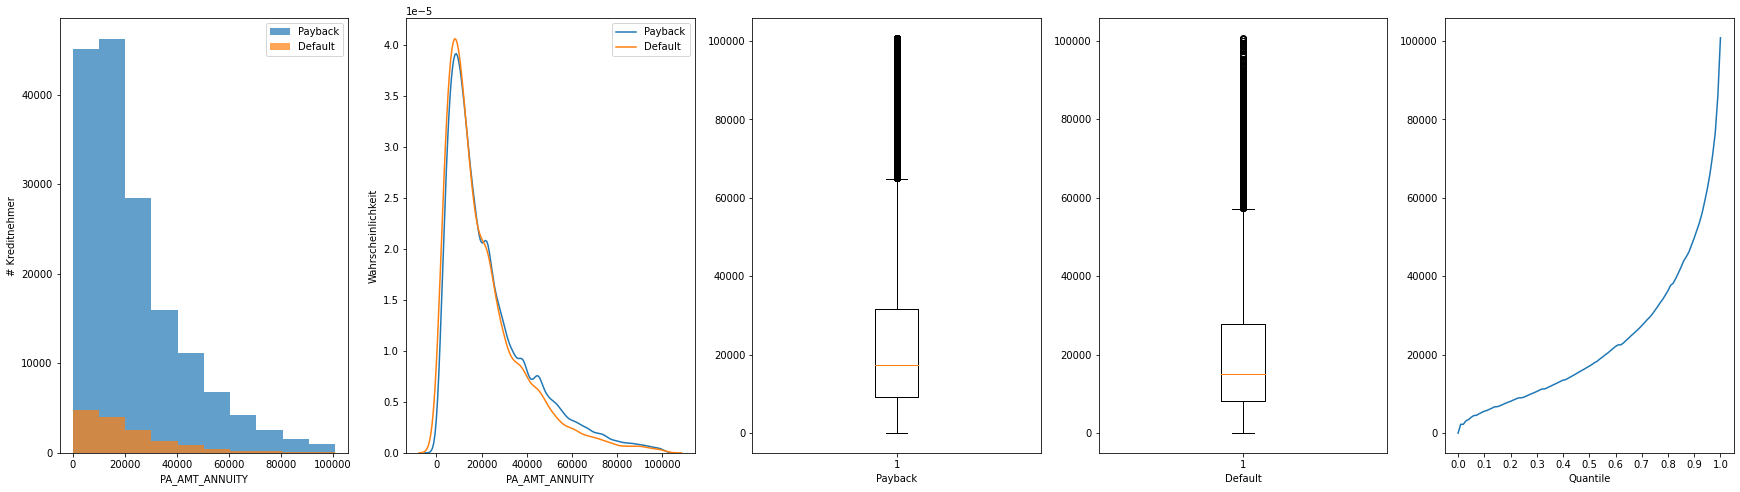

### PA_AMT_APPLICATION

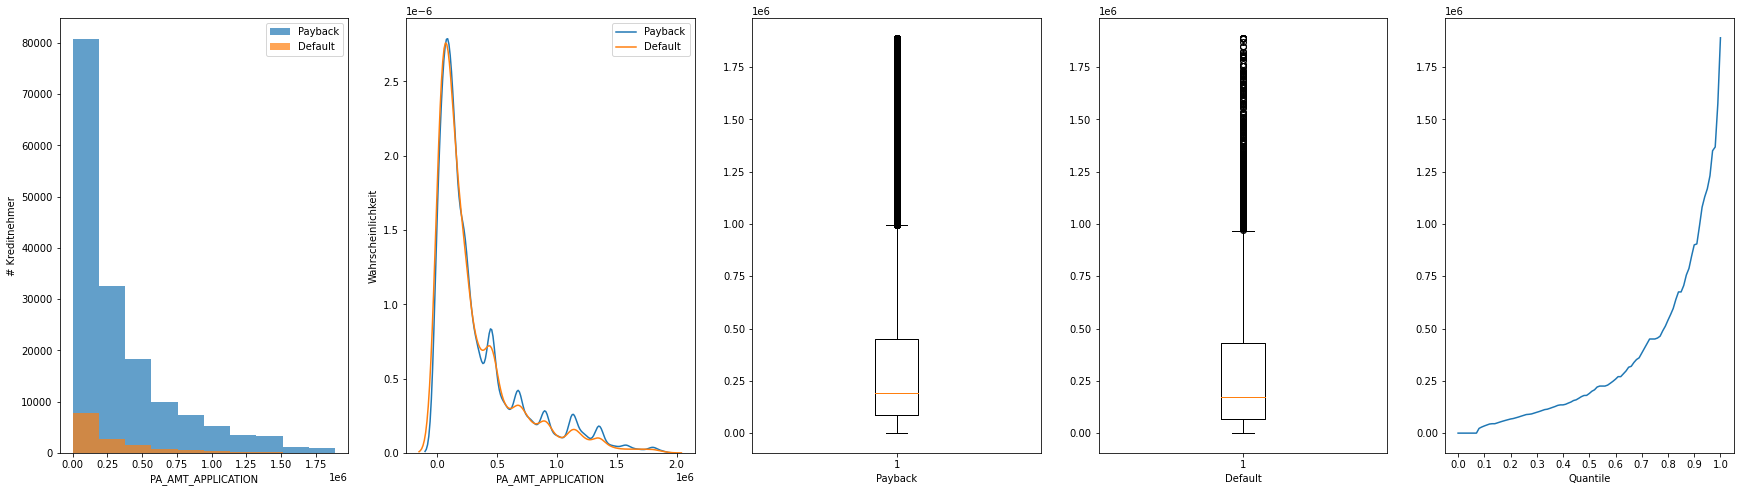

### PA_AMT_CREDIT

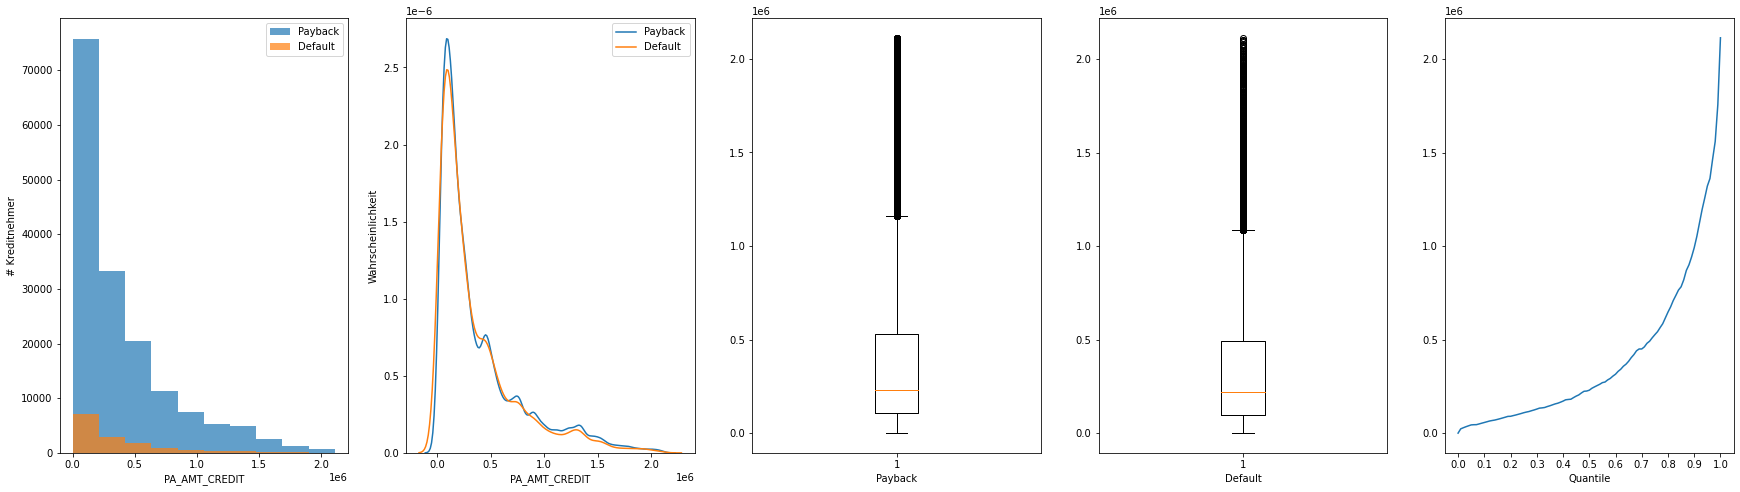

### PA_AMT_DOWN_PAYMENT

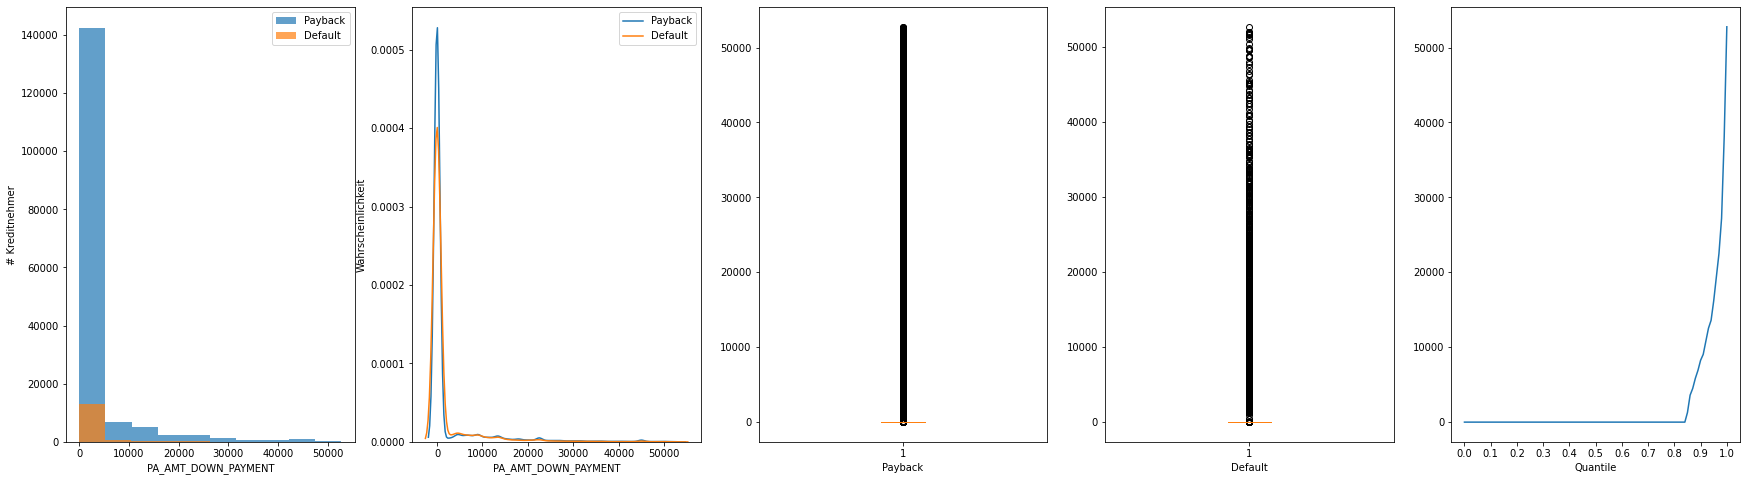

### PA_AMT_GOODS_PRICE

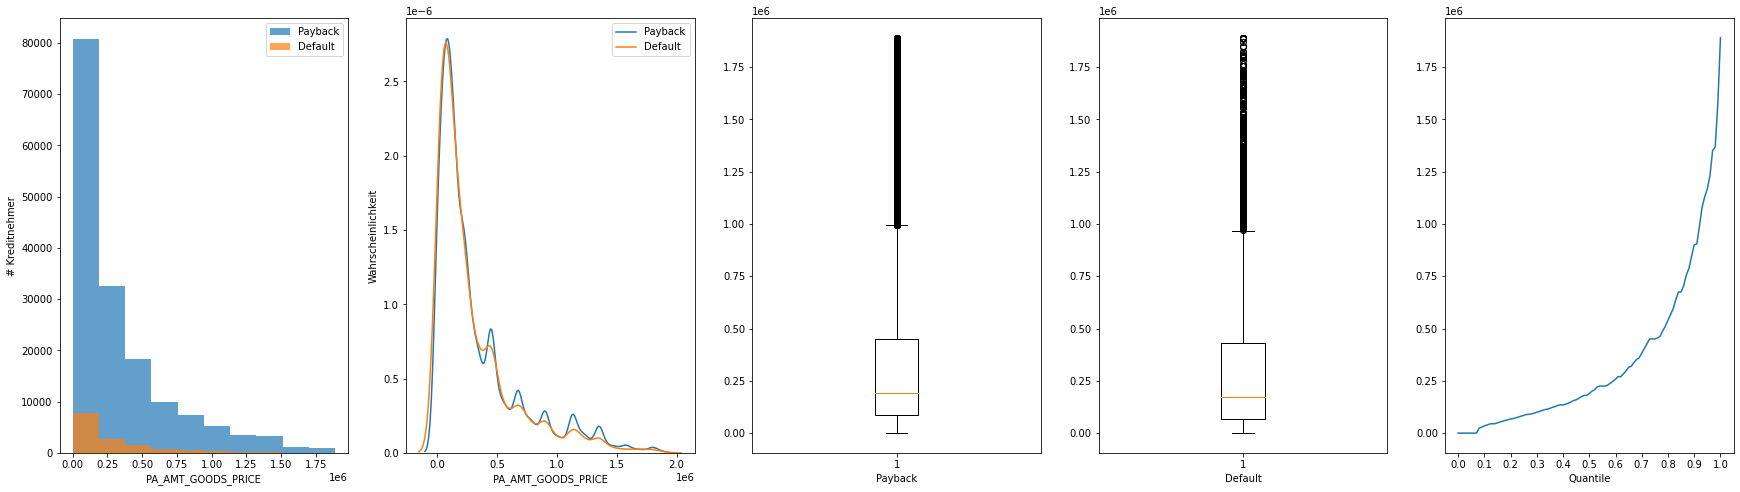

### PA_RATE_DOWN_PAYMENT

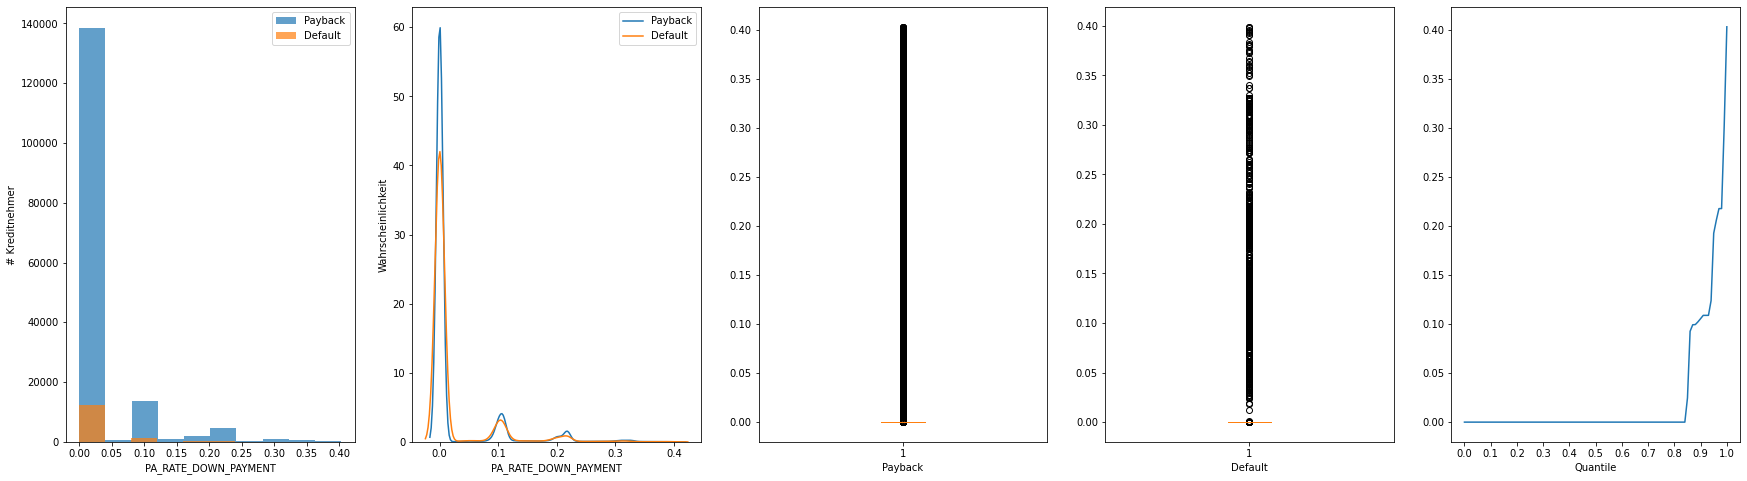

In [45]:
for head in mets:
    display(Markdown("### {head}".format(head=head)))

    pb = payback[head].copy()
    df = default[head].copy()

    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5)
    fig.set_size_inches(30, 8)

    ax1.hist(pb, alpha=0.7)
    ax1.hist(df, alpha=0.7)
    ax1.legend(labels=["Payback","Default"])
    ax1.set_xlabel(head)
    ax1.set_ylabel("# Kreditnehmer")

    sns.kdeplot(pb, alpha=0.7, ax=ax2)
    sns.kdeplot(df, alpha=0.7, ax=ax2)
    ax2.legend(labels=["Payback","Default"])
    ax2.set_xlabel(head)
    ax2.set_ylabel("Wahrscheinlichkeit")

    a = payback[head].copy()
    a = a.dropna()
    ax3.boxplot(a)
    ax3.set_xlabel("Payback")
    

    b = default[head].copy()
    b = b.dropna()
    ax4.boxplot(b)
    ax4.set_xlabel("Default")

    quantiles = [pa_ip[head].quantile(el) for el in np.arange(0,1 + 0.01,0.01)]
    ax5.plot(np.arange(0,1 + 0.01,0.01), quantiles)
    ax5.set_xticks(np.arange(0,1 + 0.1,0.1))
    ax5.set_xlabel("Quantile")

    plt.show()

In [46]:
pa_ip.to_csv(DATASET_DIR / "3. Ausreißerbereinigung" / "pa_ip.csv")